<a href="https://colab.research.google.com/github/Kwasi-Dankwa/credit-card-fraud-ml/blob/main/fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv('/content/creditcard.csv')
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# EDA PHASE

In [6]:
# EDA/ information on columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# dimensions
df.shape

(284807, 31)

In [15]:
# Summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
#proportion of Class values in percentage
df["Class"].value_counts(normalize=True)*100

,proportion
Class,
0,99.827251
1,0.172749


This shows the dataset is highly unbalanced. The percentage of fraudulent transactions is 17.3% compared to transactions which are not fraudulent. This can impact how well the machine learning models perform.

Oversampling through SMOTE is a key method in order to address imbalances


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

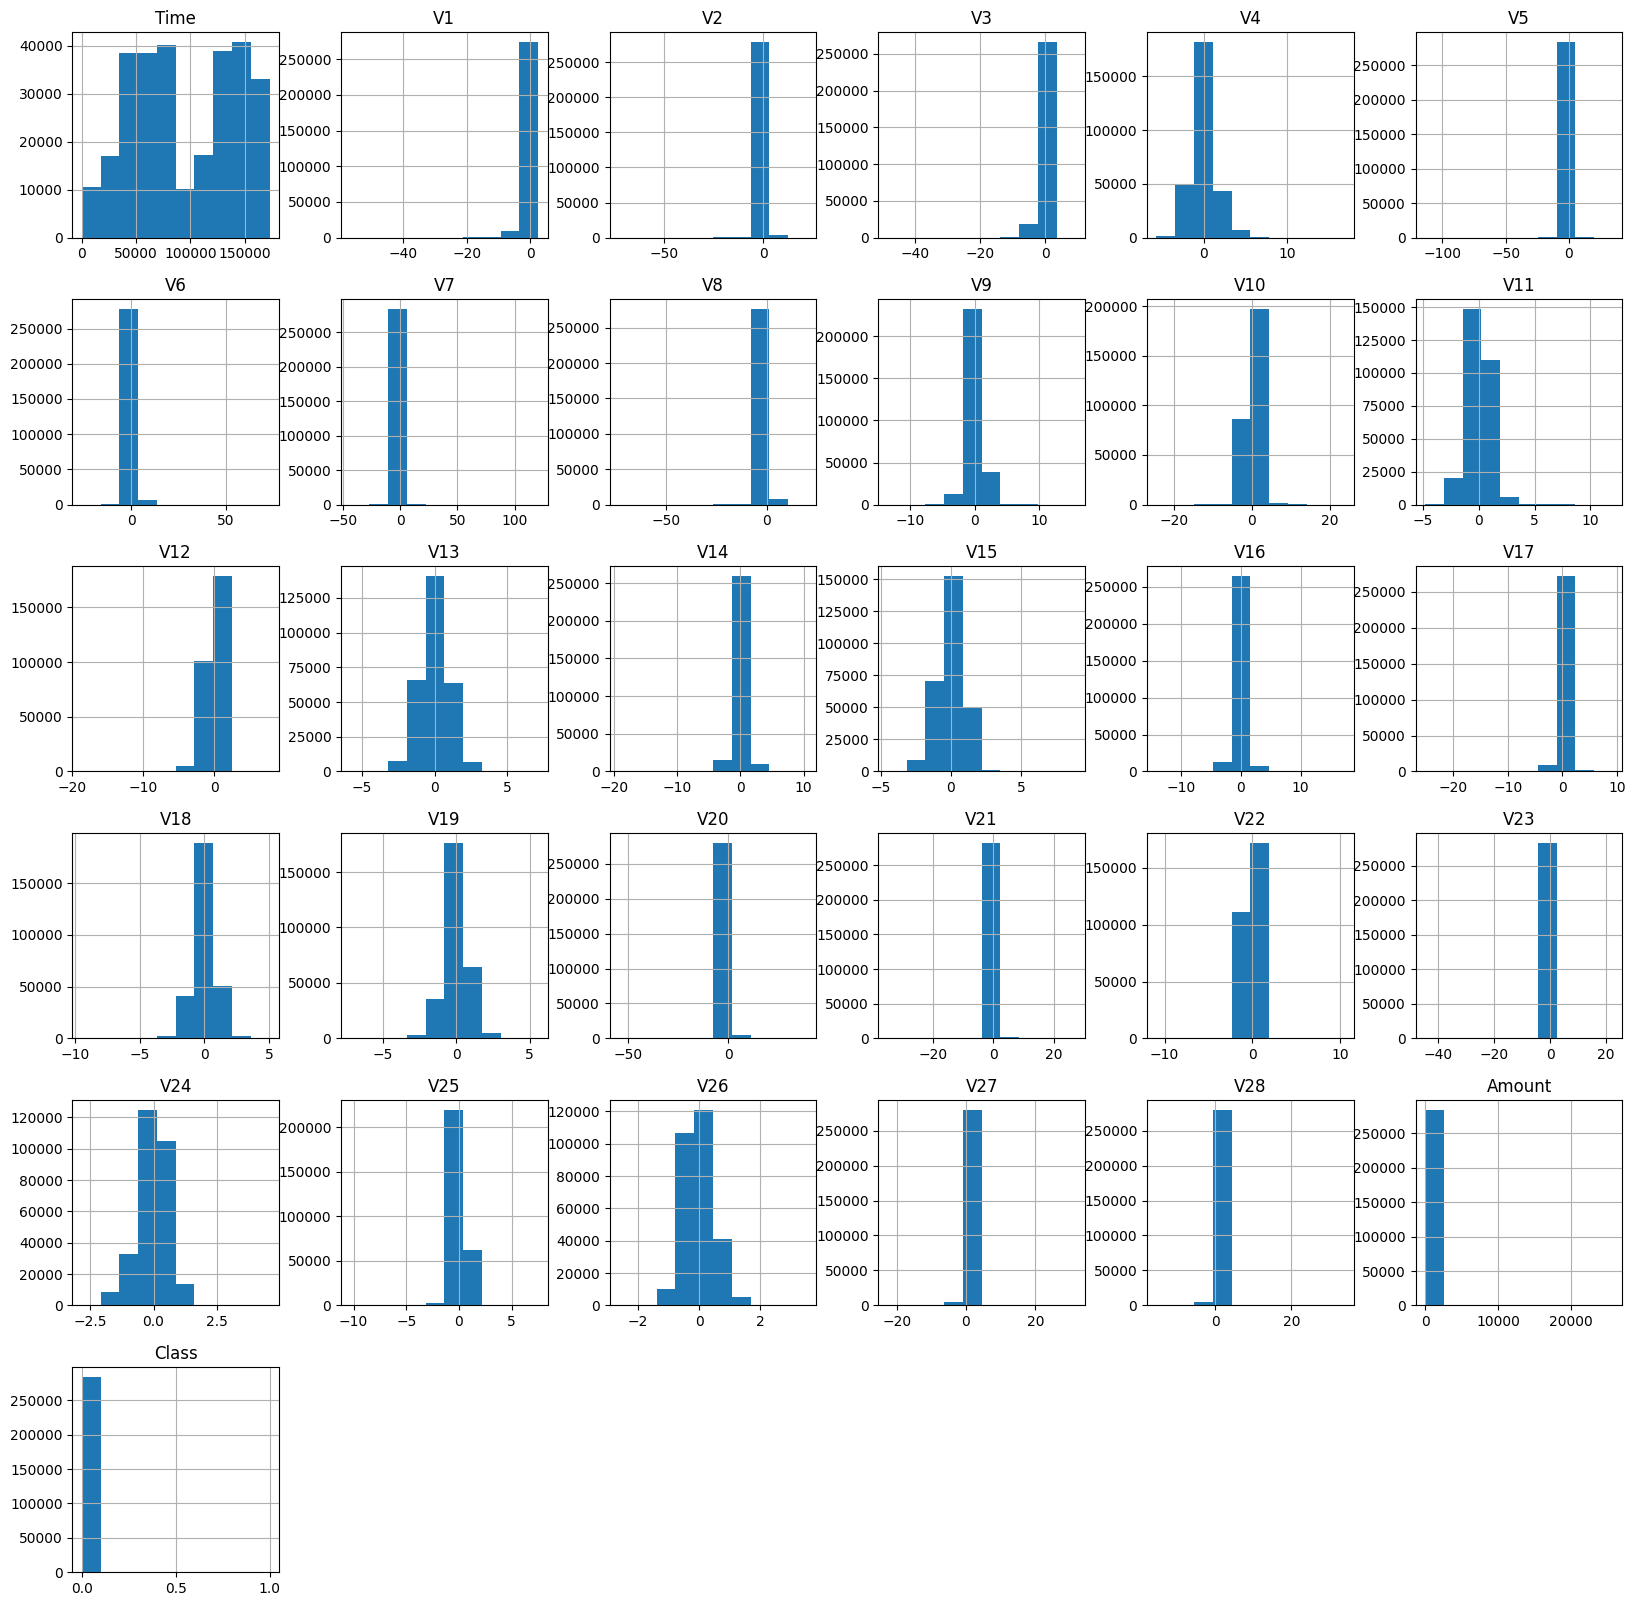

In [14]:
#  Histogram/ Visualization
df.hist(figsize=(20,20) )

As expected, The 'Class' histogram shows a dramatic difference in the number of instances for the two classes (represented by 0 and 1). There is a huge bar for class 0 and a tiny, almost imperceptible bar for class 1. This shows that the vast majority of the data points belong to one class, and a very small fraction belongs to the other.

Other histograms (for 'Time', 'V1' through 'V28', and 'Amount') show the distribution of each feature. Most of these features have a concentrated distribution, often centered around zero, or showing a skew in one direction. Others such as, 'Time', 'V4', and 'Amount', have more varied distributions.

In [8]:
# empty columns
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


There are no empty columns in the dataset

# DATA PREPROCESSING

In order to prevent larger values from dominating the learning process, it is important to scale certains colums such as df["Amount"]

In [22]:
# scale amount and time columns
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1,1))


In [25]:
# Dropping time column
df = df.drop(["Time"], axis=1)

In [26]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [28]:
# check for duplicated data and remove them to avoid bias in prediction
df.duplicated().any()

np.True_

In [30]:
df = df.drop_duplicates()
df.shape

(275663, 30)

Duplicated data can introduce a significant bias into the model. Duplicates were removed to avoid overfitting, where the model performs well on the training data but poorly on new, unseen data.

In [32]:
df["Class"].value_counts(normalize=True)*100

,proportion
Class,
0,99.828414
1,0.171586


<Axes: xlabel='Class', ylabel='count'>

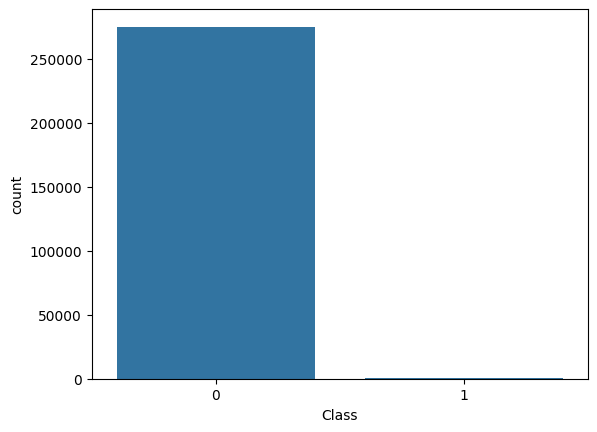

In [33]:
# Visualization
sns.countplot(x="Class", data=df)

This visualization confirms dataset is still unbalanced even after removing duplicate values

# Model Training

In [35]:
# setting variables for training
X = df.drop("Class", axis = 1)
y = df["Class"]


In [36]:
# training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# addressing imblances using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [40]:
y_train_resampled.value_counts()

,count
Class,
0,220148
1,220148


Both classes now have an equal number of instances (220148 each) after applying SMOTE, which addresses the class imbalance that was observed earlier.

# Model Selection


---


Summary of Model Choices

Logistic Regression: Its a simple, fast, and highly interpretable baseline model and a great starting point to understand the basic relationships between your features and the target variable.

Decision Tree: Its a non-linear model that is good at capturing complex, rule-based patterns. It's useful for finding specific combinations of features that may indicate fraud.

Random Forest: This is an ensemble model that combines many Decision Trees. It's known for its high accuracy and ability to reduce overfitting. It's a powerful and robust choice for this kind of classification problem.

XGBoost: A state-of-the-art Gradient Boosting model known for its performance and speed. It's highly effective for imbalanced datasets and is often a top performer in competition. This makes it essential to understand how it can optimize this specific problem

---



In [46]:
# Models
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBoost Classifier": xgb.XGBClassifier()
}


for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Logistic Regression===========

 Accuaracy: 0.9992563437505668

 Precision: 0.890625

 Recall: 0.6263736263736264

 F1 Score: 0.7354838709677419

==========Decision Tree Classifier===========

 Accuaracy: 0.998911722561805

 Precision: 0.6565656565656566

 Recall: 0.7142857142857143

 F1 Score: 0.6842105263157895

==========Random Forest Classifier===========

 Accuaracy: 0.9994739992382058

 Precision: 0.918918918918919

 Recall: 0.7472527472527473

 F1 Score: 0.8242424242424242

==========XGBoost Classifier===========

 Accuaracy: 0.9993651714943863

 Precision: 0.8783783783783784

 Recall: 0.7142857142857143

 F1 Score: 0.7878787878787878


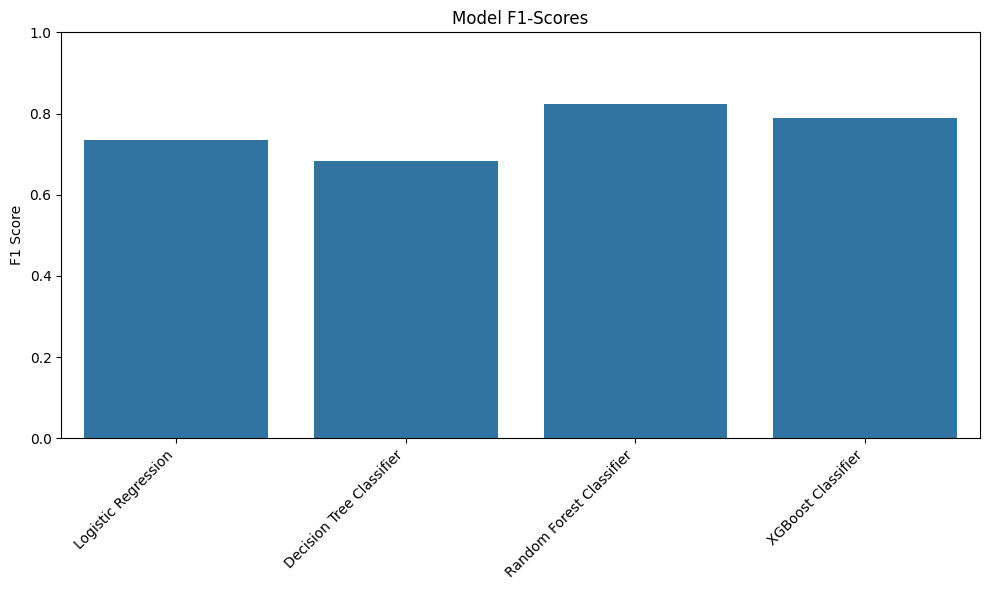

In [56]:
# Visualizing performance of all models
model_names = list(classifier.keys())
f1_scores = [f1_score(y_test, clf.predict(X_test)) for clf in classifier.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=f1_scores)
plt.title('Model F1-Scores')
plt.ylabel('F1 Score')
plt.ylim(0, 1) # F1 score is between 0 and 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Results
The results show that the Random Forest Classifier is the best-performing model for this fraud detection problem. The results indicate that this model strikes the most effective balance between precision and recall, which are both important for an imbalanced dataset.

It has the highest recall of 0.747 therefore the Random Forest is the most successful at correctly identifying fraudulent transactions, thus minimizing the number of missed fraud cases. Furthermore, its high precision of 0.919 shows that it maintains a low rate of false positives, which is important for not disrupting legitimate customers. This superior performance across the most relevant metrics for this task, particularly the F1-Score of 0.824, solidifies its position as the optimal model among the four models that have been tested.









# Feature Importance Anlaysis

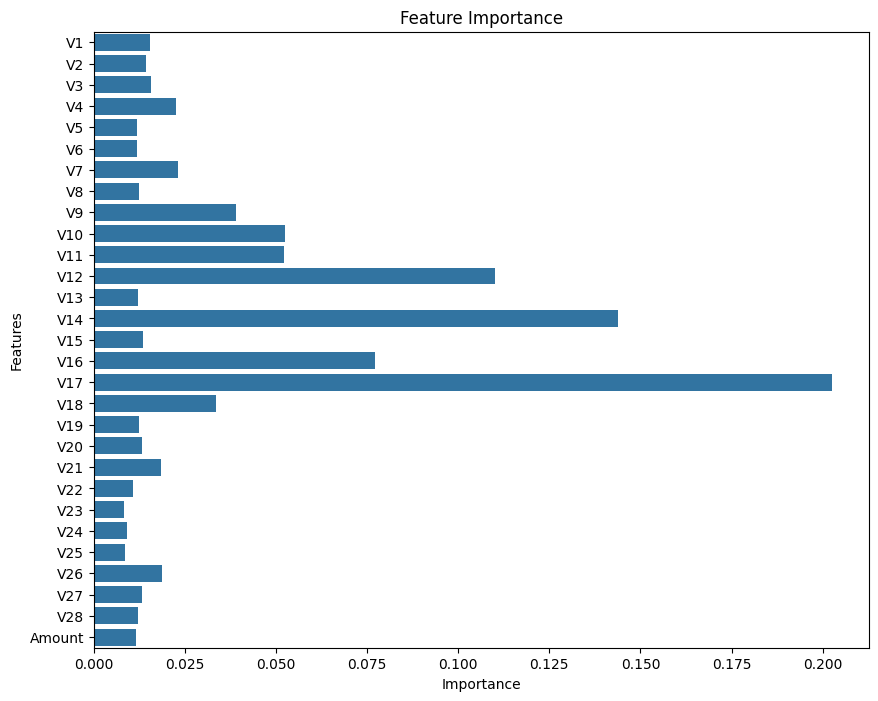

In [54]:
# feature performance analysis
feature_importance = classifier["Random Forest Classifier"].feature_importances_
features = X.columns
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

This analysis shows that when the model is making a decision about whether a transaction is fraudulent or not, the value of the 'V14' feature is the single most influential factor. Even though, many of the other 'V' features, as well as 'Amount', have very low or almost zero importance. This doesn't necessarily mean they are useless, but the model has found that 'V14', 'V17', and 'V12' are the most powerful predictors.